In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

(sec-filters)=
# Subtractive Synthesis and Filters

In [additive synthesis](sec-additive-synthesis) we start with silence and add more and more simple wave forms together to achieve a complex sound.
*Subtractive synthesis* works the opposite.
We start with rich / complex signal, such as *white noise* and apply *filters* to reduce, remove, or even amplify the amplitude of certain frequency bands.
Consequently, if we talk about subtractive synthesis, we have to talk about **filters**!

>Any medium through which the music signal passes, whatever its form, can be regarded as a filter. 
However, we do not usually think of something as a filter unless it can modify the sound in some way. 
For example, speaker wire is not considered a filter, but the speaker is (unfortunately).
-- Julius O. Smith

A *digital filter* is just a filter that operates on digital signals, such as sound represented inside a computer.
Because of how we normally interprete the term, *filter* our fundamental understanding of filters might be that they make parts of the signal quieter -- which is not the whole story.
With respect to the frequency domain, filters have a 

1. **amplitude frequency response**, and
2. **phase response**.

If a filter sharply sets the a specific range of frequencies to zero and let the rest untouched it is called *brick wall*.
For example, we could compute the [Fourier transform](def-fourier-transform-exp) of a signal and then multiply frequency in that range with zero.
For computational complexity and buffering reasons, such ideal filters are rahter unpractical for real-time use.
Therefore, most filters work differently.
They reduce or strengthen the power of certain frequencies.

```{admonition} Filtering and the Fourier transform
:name: remark-filtering-and-convolution
:class: remark

Filtering can be achieved by multiplication in the spectural domain and by convolution in the time domain.

```

For example, if we want to completely filter out all high frequencies up to a *cutoff frequency* $f_c$ without touching the low frequencies $(f \leq f_c)$, our ideal *brick wall filter* would have an amplitude frequency response that looks like the following plot.

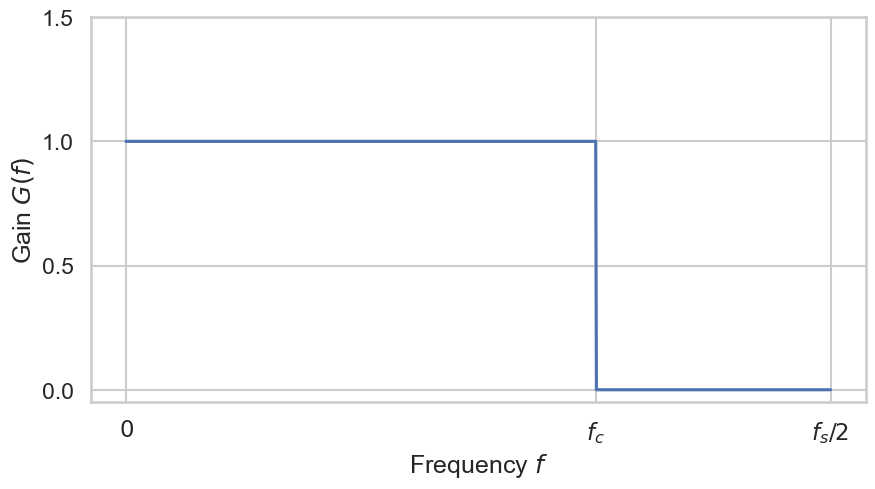

In [2]:
f_s = 3
f_c = 2
t = np.linspace(0, f_s, 1000)
gain = lambda x: 1 if x <= f_c else 0
y = [gain(val) for val in t]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, y, label=r'$y(t)$')
ax.set_xticks([0, f_c, f_s])
ax.set_xticklabels([r'$0$', r'$f_c$', r'$f_s/2$'])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlabel('Frequency $f$');
ax.set_ylabel(r'Gain $G(f)$');

Such *ideal filter* is the simplest lowpass filter.
The gain is 1 in the *passband*, which pans frequencies from 0 Hz to the *cutoff frequency* $f_c$ Hz, and its gain is 0 in the *stopband* (all frequencies above $f_c$).
The output spectrum is obtained by multiplying the input spectrum by the amplitude response of the filter.

Apart from changing the level of specific frequencies, filters often change the phase of the signal, e.g., $\sin(2\pi t)$ is transformed to $\sin(2\pi t + 0.5\pi)$.
Some filters do primarily apply such period shifts and we might not think of them as filters.
For example, the *allpass filter* does passes all frequencies untouched but attunes the phases.

*Lowpass filters* are used everywhere because they can smoothen the harshness of a sound.
A lot of filters allow support a feedback cycle, i.e., the output signal of the filter goes back into the filter.
Each time the signal is fed into the filter, its level gets reduced such that the feedback eventually comes to an end.
Such feedback can be used to synthesis reverberation.
In combination with an *impulse* (e.g. [Impuse](https://doc.sccode.org/Classes/Impulse.html)) filters can be used to contruct surprising effects.
And with ressonance, filters can add many aspects to the timbre of a sound.

[SuperCollider](https://supercollider.github.io/) offers a large variety of filters.
Execute

```isc
Filter.dumpClassSubtree;
```

to print a list of all filters to the post window.

In summary, filters and substractive synthesis are inseperable.

+ We can use static filters to emphasize specific frequencies.
+ We can use static filters to create formants in a sound and imitate the characteristics of the human voice or traditional acoustic instruments.
+ A [resonance filter](sec-resonance) with a moderate *resonance bandwidth* with a cutoff frequency that tracks the pitch can create a characteristic quality that remains tonally consistent as we play the keyboard.
+ For some *resonance filters*, if we decrease the *resonance bandwidth*, we enter an area where the filter is at the brick of self-oscillation. This creates a distinctive distortion that can be a perfect starting point.
+ If we decrease the *resonance bandwidth* even further, the filter will become a sine wave generator in its own right. In theory, no input signal is passed at this point, but few filters altogether remove all the signal, and the result is a tortured sound that has extensive uses in modern music.

In analog synthesis, filters are the defining element of a synthesizer.
They are also crucial in digital synthesis, and if you are into creative synthesis, your sound generation will depend upon what you have and what you do with it.